In [1]:
from utils import *
from data import *
import glob, os
import pandas as pd

data, labels= get_data("data/data.csv", nrows=None)

In [22]:
labels = pd.Series(labels)

In [44]:
len(labels)

299773

In [23]:
ulab = labels.explode().unique()
print(len(ulab))

737


In [24]:
lab_counts = labels.explode().value_counts()

In [25]:
top_50_labels = lab_counts[:50]

In [26]:
top_50_labels

CCAT      137531
USA        99966
GCAT       82580
MCAT       81940
C15        59207
ECAT       42374
UK         34896
C151       33963
M14        33786
C152       27095
M13        21499
JAP        20272
GPOL       20042
M11        19593
M141       19124
C18        18675
E21        16055
C181       15598
C17        14398
C31        13862
C13        13216
I81402     13171
GDIP       13040
GSPO       12592
GFR        11984
GCRIM      11705
C24        11338
M132       11298
M12        11210
FRA        11077
M131       10930
GVIO       10668
AUSTR      10278
E12        10253
E212        9757
INDIA       9388
M143        8658
C21         8641
C1511       8429
CHINA       8379
C11         8350
EEC         7843
I13000      7741
E51         7419
G15         6731
C171        6565
CANA        6560
E211        6244
RUSS        6139
I33020      6060
dtype: int64

<Axes: title={'center': 'Number of tags'}>

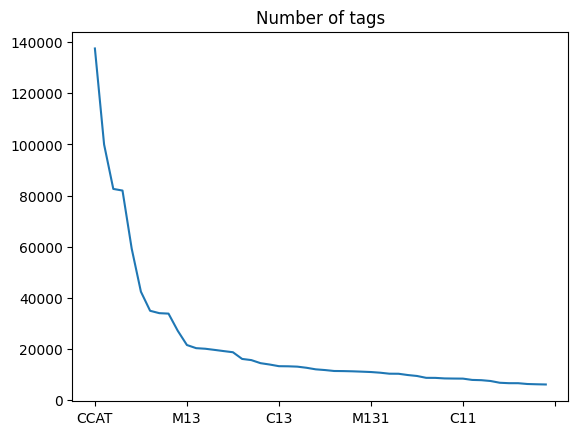

In [27]:
top_50_labels.plot(kind='line', title="Number of tags")

In [29]:
top_50_labels.index

Index(['CCAT', 'USA', 'GCAT', 'MCAT', 'C15', 'ECAT', 'UK', 'C151', 'M14',
       'C152', 'M13', 'JAP', 'GPOL', 'M11', 'M141', 'C18', 'E21', 'C181',
       'C17', 'C31', 'C13', 'I81402', 'GDIP', 'GSPO', 'GFR', 'GCRIM', 'C24',
       'M132', 'M12', 'FRA', 'M131', 'GVIO', 'AUSTR', 'E12', 'E212', 'INDIA',
       'M143', 'C21', 'C1511', 'CHINA', 'C11', 'EEC', 'I13000', 'E51', 'G15',
       'C171', 'CANA', 'E211', 'RUSS', 'I33020'],
      dtype='object')

In [31]:
in_top_50 = labels.explode().apply(lambda x: x in top_50_labels.index)

In [35]:
in_top_50

0          True
0          True
0          True
1          True
1          True
          ...  
299770     True
299771    False
299771    False
299771    False
299772     True
Length: 1553537, dtype: bool

In [39]:
x = labels.explode()[in_top_50]
x.index.name = 'index'

#.groupby(0).apply(list)

In [42]:
new_labels = x.groupby('index').apply(list)

In [43]:
len(new_labels)

299475

In [48]:
data.index.name = 'index'

In [ ]:
pd.DataFrame()

In [49]:
new_df = pd.concat([data, new_labels], axis=1)


In [54]:
new_df = new_df.dropna(how='any')

In [58]:
len(new_df[1].explode().unique())

50

In [67]:
new_df.columns = ['text','label']

In [68]:
new_df

,text,label
index,,
0,reuter ec report long-term diary for apr 7 - d...,"[EEC, G15, GCAT]"
1,official journal contents - oj l 85 of march 2...,"[EEC, G15, GCAT]"
2,toronto stocks end higher after volatile sessi...,"[CANA, M11, MCAT]"
3,tse says will not halt bre-x on request. after...,"[CANA, C13, C15, C152, CCAT, M11, MCAT]"
4,suncor lowers canada posted oil prices. suncor...,"[CANA, M14, M143, MCAT]"
...,...,...
299767,teamsters' carey to hold news conference. the ...,"[USA, CCAT, ECAT, GCAT]"
299768,ups says has deal to end teamsters' strike. un...,[USA]
299769,ups says has tentative deal to end strike. uni...,"[USA, CCAT, ECAT, GCAT]"


In [70]:
new_df.to_csv("data/new_data.csv", sep="|")

In [23]:
import nltk
from nltk.corpus import stopwords
stopwords_eng = set(stopwords.words('english'))
stopwords_eng.update(["say","says","said"])

In [24]:
"say" in stopwords_eng

True

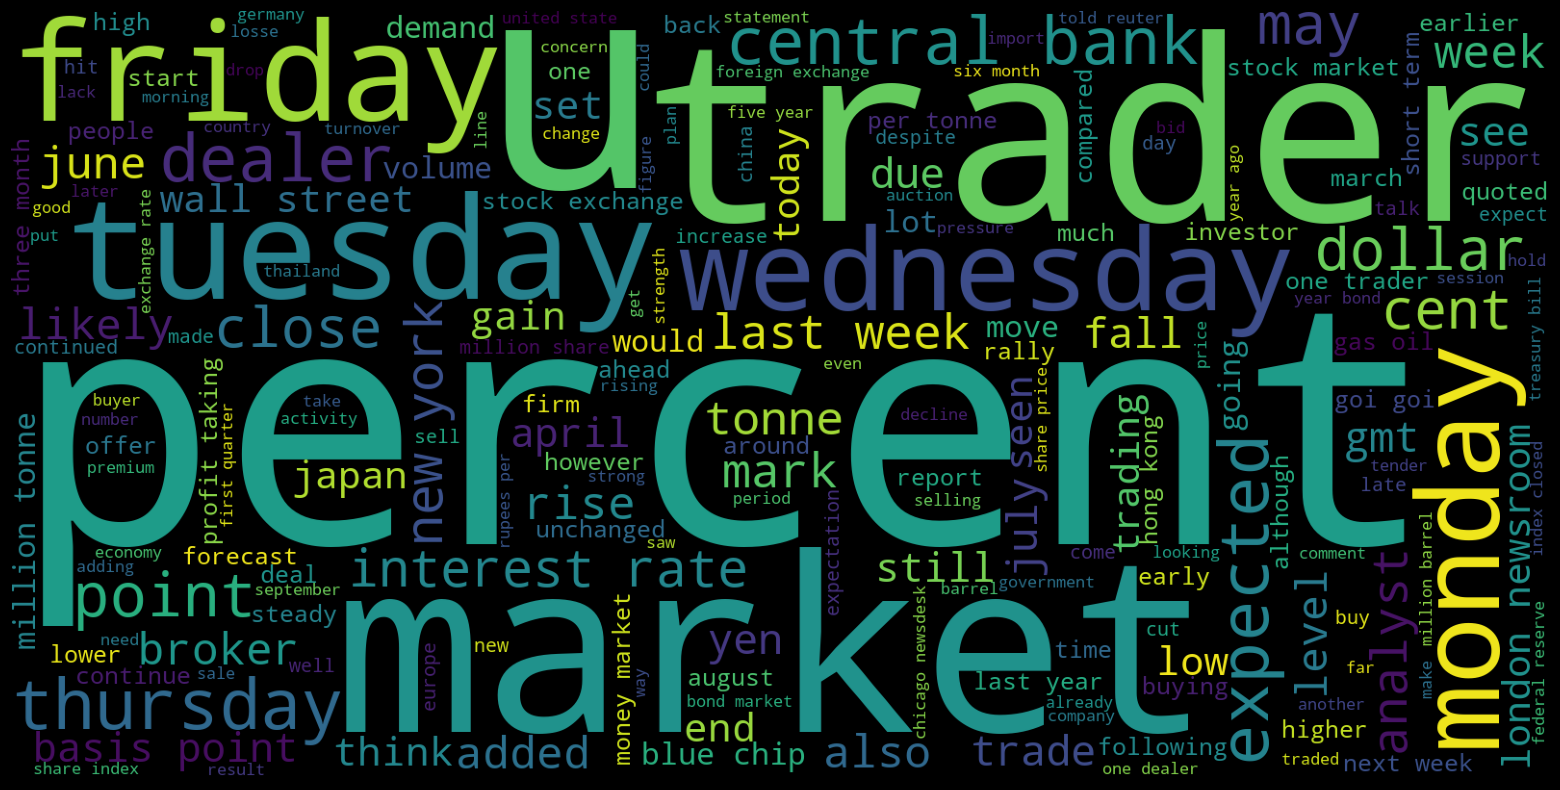

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

the_one = lab_counts.index[3]
idx = lab.apply(lambda x: the_one in x)

# Start with one review:
text =  ' '.join(data[idx].values).lower()

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords_eng).generate(text)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(f'wordcloud_{the_one}.png', facecolor='k', bbox_inches='tight')

#plt.tight_layout(pad=0)
#plt.show()